In [156]:
%matplotlib inline

In [158]:
%run notebook_setup.py

In [159]:
import matplotlib.pyplot as plt

In [175]:
import numpy as np

In [128]:
import sys
sys.path.insert(1, "/Users/rluger/src/starry-process/tests")
from numerical import R

In [134]:
ydeg = 10
alpha = 0.1
omega = 1.0

In [135]:
Rx = lambda phi: R(ydeg, phi, cos_alpha=0, sin_alpha=1, cos_gamma=0, sin_gamma=-1)[ydeg]
Ry = lambda lam: R(ydeg, lam, cos_alpha=1, sin_alpha=0, cos_gamma=1, sin_gamma=0)[ydeg]
g = lambda phi, t: -omega * alpha * t * np.sin(phi) ** 2

In [300]:
S = np.zeros((2 * ydeg + 1, 2 * ydeg + 1))
S[ydeg, ydeg] = 1

In [301]:
def prod(phi, t=0.0, tp=9.5, **kwargs):
    return Ry(g(phi, t)) @ Rx(phi) @ S @ Rx(phi).T @ Ry(g(phi, tp))

In [302]:
def p(phi, mu=0.2, sigma=0.1, **kwargs):
    c = np.sqrt(np.pi ** 2 / 3 - 2) / sigma
    if mu - np.pi / c < phi < -mu + np.pi / c:
        res = 2 + np.cos(c * (phi - mu)) + np.cos(c * (phi + mu))
    elif np.abs(phi - mu) < np.pi / c:
        res = 1 + np.cos(c * (phi - mu))
    elif np.abs(phi + mu) < np.pi / c:
        res = 1 + np.cos(c * (phi + mu))
    else:
        res = 0
    return c / (4 * np.pi) * res

In [303]:
def integrand(phi, **kwargs):
    return prod(phi, **kwargs) * p(phi, **kwargs)

In [304]:
mu = 0.2
sigma = 0.1
lima = max(0, mu - sigma * np.pi / np.sqrt(np.pi ** 2 / 3 - 2))
limb = mu + sigma * np.pi / np.sqrt(np.pi ** 2 / 3 - 2)
phi = np.linspace(lima, limb, 100)
I = np.array([integrand(phi_k, mu=mu, sigma=sigma) for phi_k in phi])

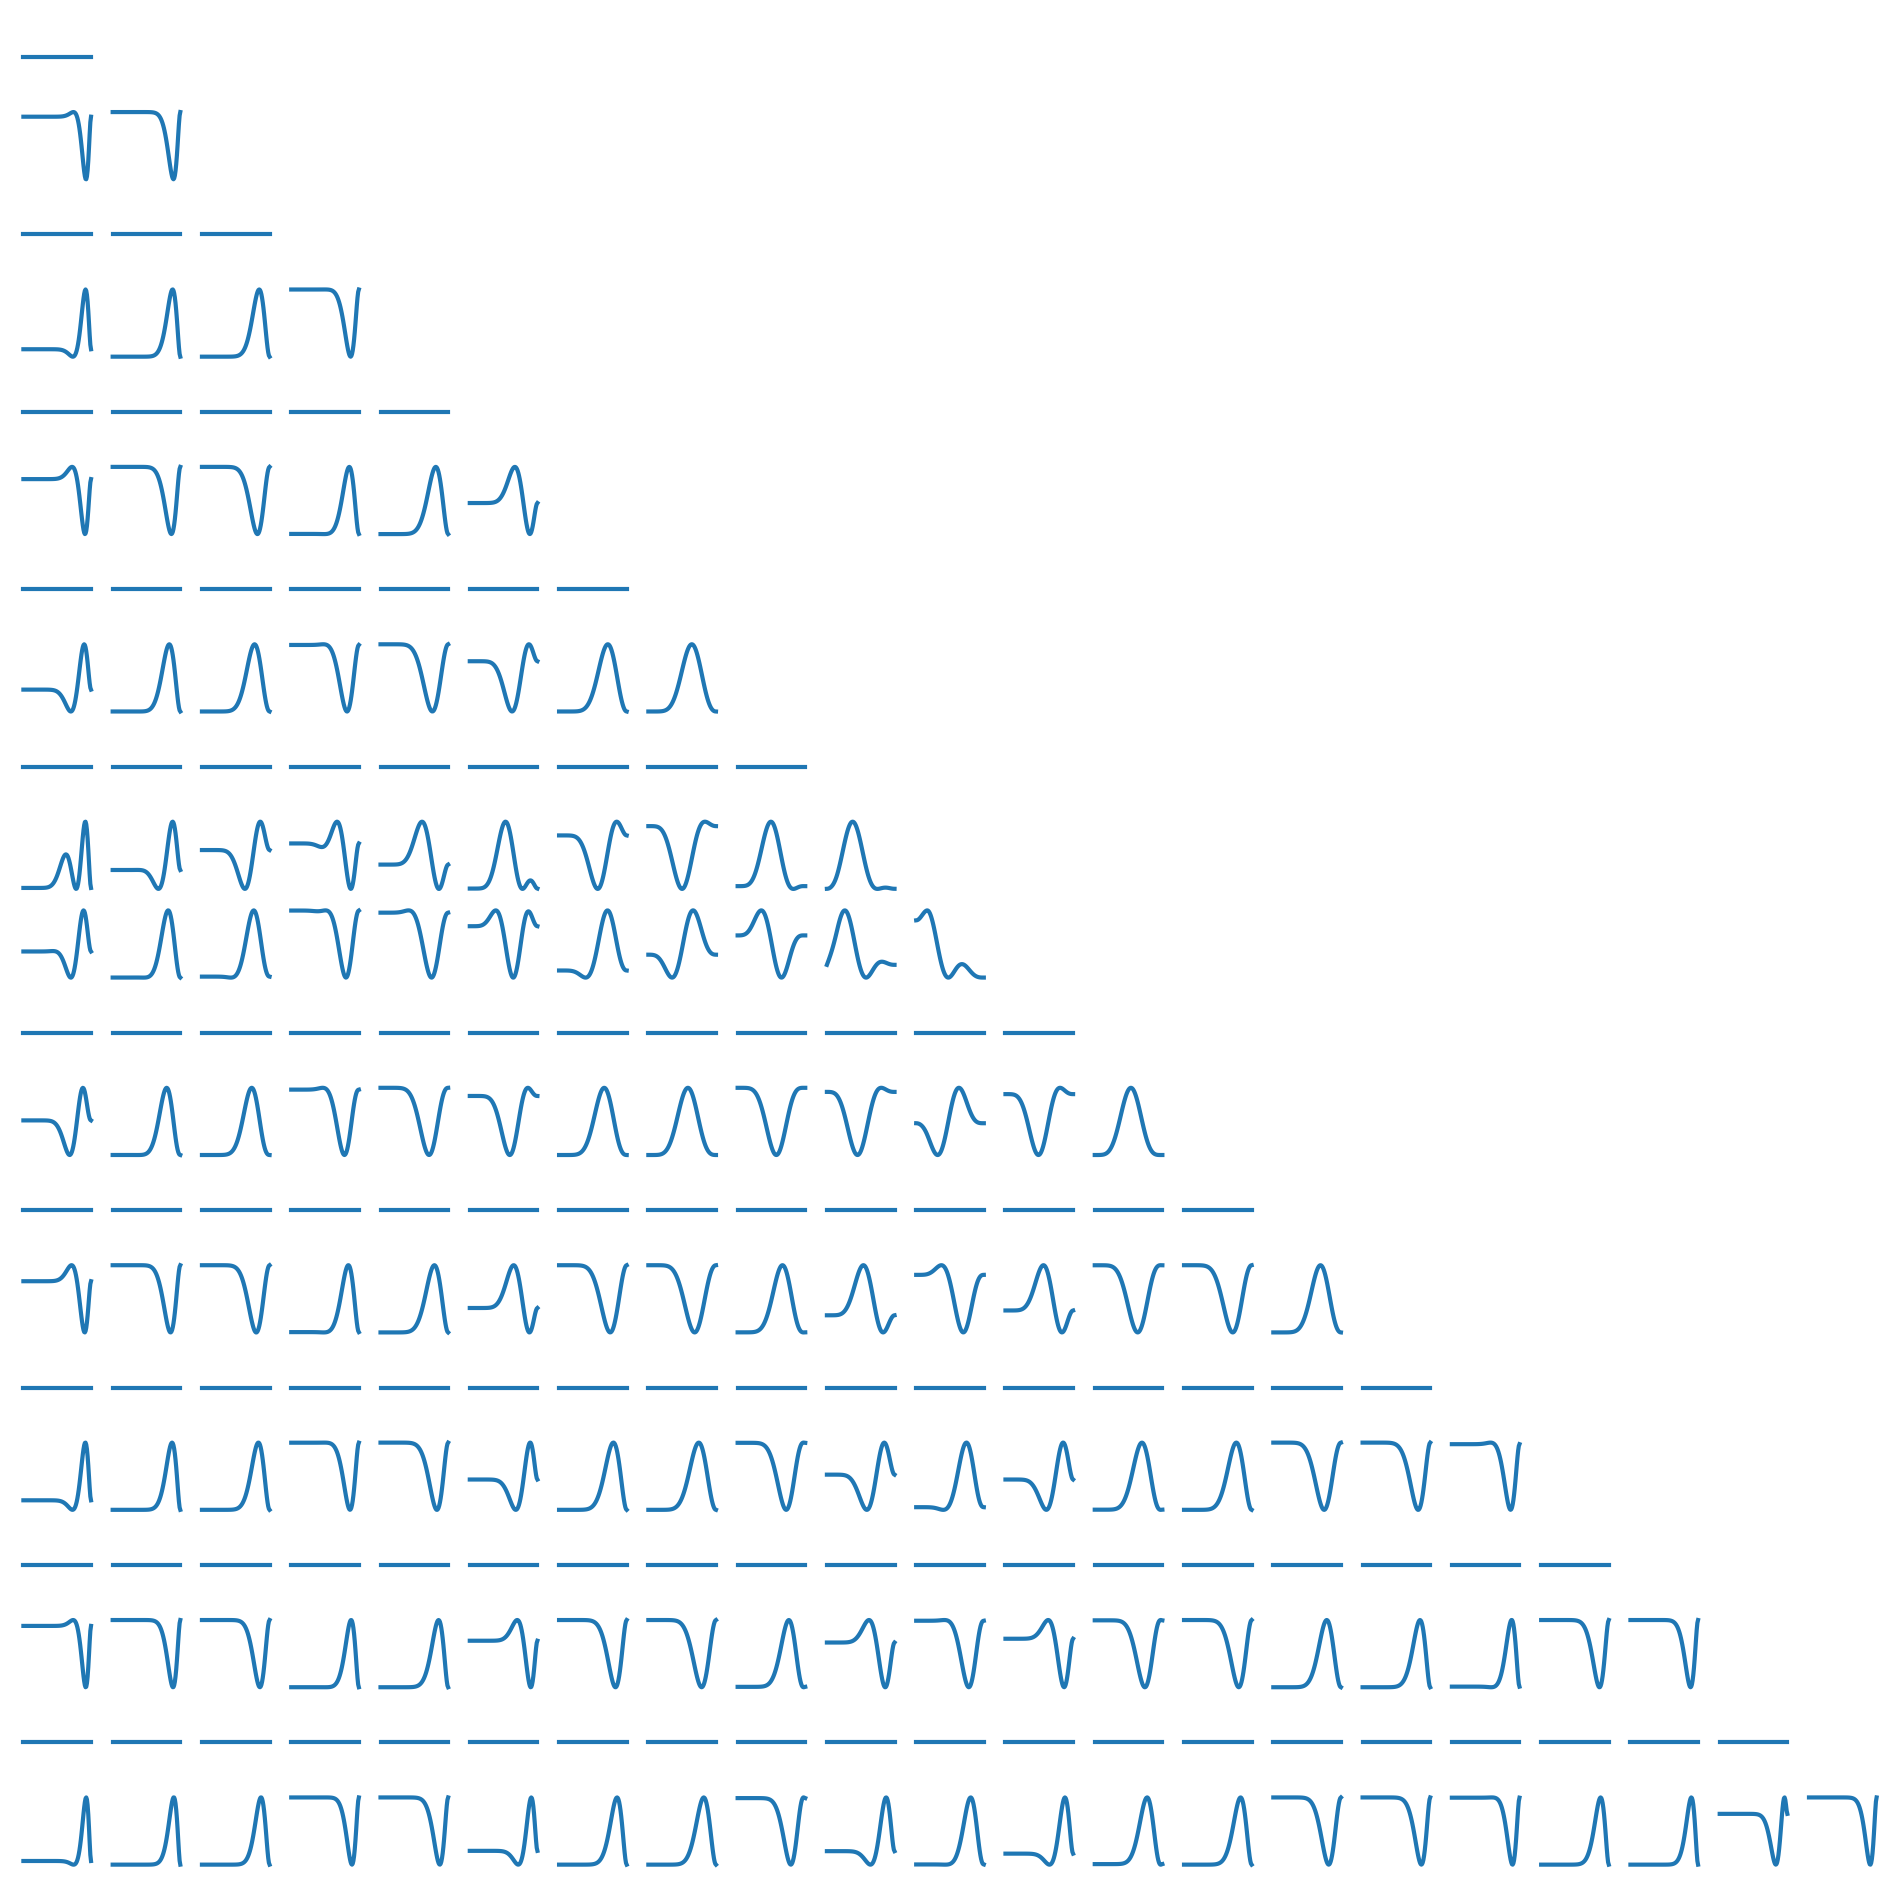

In [305]:
fig, ax = plt.subplots(2 * ydeg + 1, 2 * ydeg + 1, figsize=(12, 12))
for m in range(2 * ydeg + 1):
    for n in range(m + 1):
        ax[m, n].plot(phi, I[:, m, n])
for axis in ax.flatten():
    axis.axis("off")

In [306]:
from scipy.integrate import quad, fixed_quad

In [307]:
func = lambda phi: integrand(phi, mu=mu, sigma=sigma)[9, 9]
quad(func, lima, limb)

(0.18639175269900568, 8.89373064597173e-09)

In [326]:
npts = 199
dx = (limb - lima) / (npts - 1)
s = (dx / 3) * np.concatenate([[1], np.tile([4, 2], (npts - 1) // 2)[:-1], [1]])

x = np.linspace(lima, limb, npts)
f = np.array([integrand(x_i, mu=mu, sigma=sigma) for x_i in x])

In [320]:
print((s @ f))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 199)

In [329]:
I = np.einsum("j,j...", s, f)

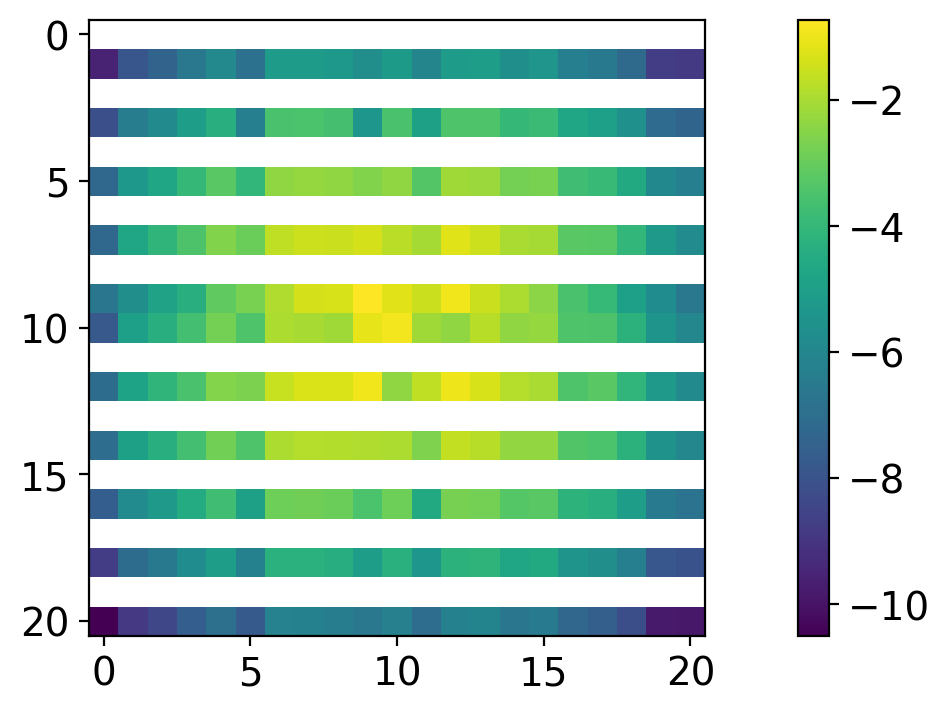

In [332]:
plt.imshow(np.log10(np.abs(I)))
plt.colorbar()

In [334]:
from scipy.special import erf

In [337]:
x = np.random.randn(1000)

In [339]:
%%timeit
erf(x)

10.8 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [340]:
%%timeit
np.sin(x)

7.02 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
